# Nepal,Uttar Pradesh,Bihar earthquake analysis

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### About dataset:
dataset contain 1607 records
Nepal,Uttar Pradesh,Bihar earthquake data magnitude more than 2.5
dataset duration 1900-2023


In [2]:
#importing the dataset
db=pd.read_csv('Nepal_up_bihar.csv')


In [3]:
db.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-04-12T00:05:07.273Z,25.9004,87.2664,10.000,4.0,mb,19.0,178.0,2.090,0.78,...,2023-04-12T16:16:30.500Z,"7 km E of Banmankhi, India",earthquake,7.05,1.963,0.173,9.0,reviewed,us,us
1,2023-04-08T14:44:48.927Z,28.7306,86.7005,57.329,4.3,mb,22.0,138.0,0.775,0.63,...,2023-04-08T19:16:58.040Z,"87 km N of Lobujya, Nepal",earthquake,7.04,16.483,0.108,24.0,reviewed,us,us
2,2023-04-01T05:42:20.397Z,27.6685,86.1761,10.000,4.5,mb,37.0,84.0,0.806,0.62,...,2023-04-12T05:21:56.848Z,"38 km SSE of Kod?ri??, Nepal",earthquake,6.89,1.919,0.086,40.0,reviewed,us,us
3,2023-03-24T04:06:24.411Z,29.6326,81.8280,30.882,4.2,mb,23.0,171.0,3.538,0.80,...,2023-04-15T02:36:32.040Z,"52 km NW of Jumla, Nepal",earthquake,13.44,7.587,0.152,12.0,reviewed,us,us
4,2023-03-02T08:12:56.235Z,28.3307,87.3045,10.000,4.0,mb,28.0,106.0,0.572,0.38,...,2023-03-18T13:06:26.819Z,"63 km NE of Lobujya, Nepal",earthquake,2.61,1.905,0.119,19.0,reviewed,us,us


In [4]:
db.shape

(1607, 22)

In [5]:
db.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1607 entries, 0 to 1606
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             1607 non-null   object 
 1   latitude         1607 non-null   float64
 2   longitude        1607 non-null   float64
 3   depth            1607 non-null   float64
 4   mag              1607 non-null   float64
 5   magType          1607 non-null   object 
 6   nst              524 non-null    float64
 7   gap              965 non-null    float64
 8   dmin             558 non-null    float64
 9   rms              1473 non-null   float64
 10  net              1607 non-null   object 
 11  id               1607 non-null   object 
 12  updated          1607 non-null   object 
 13  place            1603 non-null   object 
 14  type             1607 non-null   object 
 15  horizontalError  544 non-null    float64
 16  depthError       883 non-null    float64
 17  magError      

In [7]:
db.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,1607.000000,1607.000000,1607.000000,1607.000000,524.000000,965.000000,558.000000,1473.000000,544.000000,883.000000,618.000000,1401.000000
mean,29.039680,84.478942,24.238669,4.461487,44.790076,113.520518,2.367242,0.939430,7.504485,6.843716,0.127518,25.615275
std,1.221428,2.817540,16.869838,0.563490,57.467638,49.651938,2.251937,0.272958,2.189350,7.868793,0.081897,38.538808
min,23.769000,77.057000,2.000000,3.000000,5.000000,10.000000,0.027000,0.100000,2.400000,0.000000,0.033000,1.000000
25%,27.881100,82.056000,10.000000,4.100000,14.000000,76.000000,0.728500,0.740000,6.000000,1.900000,0.077000,3.000000
50%,29.251000,85.166100,19.520000,4.400000,23.000000,109.000000,1.259500,0.920000,7.300000,2.900000,0.101500,11.000000
75%,30.165000,86.666550,33.000000,4.700000,50.250000,150.000000,3.629250,1.120000,8.700000,9.100000,0.164750,32.000000
max,30.807000,88.456000,143.200000,8.000000,468.000000,291.000000,13.200000,1.890000,17.600000,55.500000,0.680000,328.000000


### Datacleaning

In [8]:
db.isnull().mean()*100

time                0.000000
latitude            0.000000
longitude           0.000000
depth               0.000000
mag                 0.000000
magType             0.000000
nst                67.392657
gap                39.950218
dmin               65.276914
rms                 8.338519
net                 0.000000
id                  0.000000
updated             0.000000
place               0.248911
type                0.000000
horizontalError    66.148102
depthError         45.052894
magError           61.543248
magNst             12.818917
status              0.000000
locationSource      0.000000
magSource           0.000000
dtype: float64

In [9]:
db.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-04-12T00:05:07.273Z,25.9004,87.2664,10.000,4.0,mb,19.0,178.0,2.090,0.78,...,2023-04-12T16:16:30.500Z,"7 km E of Banmankhi, India",earthquake,7.05,1.963,0.173,9.0,reviewed,us,us
1,2023-04-08T14:44:48.927Z,28.7306,86.7005,57.329,4.3,mb,22.0,138.0,0.775,0.63,...,2023-04-08T19:16:58.040Z,"87 km N of Lobujya, Nepal",earthquake,7.04,16.483,0.108,24.0,reviewed,us,us
2,2023-04-01T05:42:20.397Z,27.6685,86.1761,10.000,4.5,mb,37.0,84.0,0.806,0.62,...,2023-04-12T05:21:56.848Z,"38 km SSE of Kod?ri??, Nepal",earthquake,6.89,1.919,0.086,40.0,reviewed,us,us
3,2023-03-24T04:06:24.411Z,29.6326,81.8280,30.882,4.2,mb,23.0,171.0,3.538,0.80,...,2023-04-15T02:36:32.040Z,"52 km NW of Jumla, Nepal",earthquake,13.44,7.587,0.152,12.0,reviewed,us,us
4,2023-03-02T08:12:56.235Z,28.3307,87.3045,10.000,4.0,mb,28.0,106.0,0.572,0.38,...,2023-03-18T13:06:26.819Z,"63 km NE of Lobujya, Nepal",earthquake,2.61,1.905,0.119,19.0,reviewed,us,us


we can see in places we have some data of other countries also but as we want data of only india,nepal we will remove rest

In [10]:
db['place']=db['place'].str.split(',').str[1]

In [11]:
db['place']=db['place'].str.strip()

In [12]:
db['place'].unique()

array(['India', 'Nepal', nan, 'China'], dtype=object)

In [16]:
db=db[db['place'].isnull()==False]

In [17]:
db['place'].fillna('India',inplace=True)

In [18]:
db['magSource'].unique()

array(['us', 'gcmt', 'iscgem', 'dmn', 'hrv', 'ndi', 'iscgemsup'],
      dtype=object)

 We will be trying to remove columns which wont be useful to us

In [19]:
db['magSource'].value_counts()

us           1450
iscgem         61
hrv            27
gcmt           16
dmn             8
ndi             2
iscgemsup       1
Name: magSource, dtype: int64

In [20]:
db['locationSource'].unique()

array(['us', 'iscgem', 'dmn', 'iscgemsup'], dtype=object)

In [21]:
db['magSource'].value_counts()

us           1450
iscgem         61
hrv            27
gcmt           16
dmn             8
ndi             2
iscgemsup       1
Name: magSource, dtype: int64

In [22]:
db['status'].unique()

array(['reviewed'], dtype=object)

In [23]:
db['type'].unique()

array(['earthquake'], dtype=object)

In [24]:
db['updated']

0       2023-04-12T16:16:30.500Z
1       2023-04-08T19:16:58.040Z
2       2023-04-12T05:21:56.848Z
3       2023-04-15T02:36:32.040Z
4       2023-03-18T13:06:26.819Z
                  ...           
1602    2022-05-09T18:05:36.449Z
1603    2022-04-26T00:03:37.738Z
1604    2022-04-26T00:02:58.545Z
1605    2022-04-26T00:02:49.371Z
1606    2022-04-26T00:08:10.546Z
Name: updated, Length: 1565, dtype: object

we are dropping few columns which contain reductant info and which wont have much effect on our data

1. dropping type,status,place as they contain same value in all the columns
2. dropping columns updated ,magsource,locationSource as they contain information regarding the meta data like place where these data were collected location when was the data last updated and much more 

In [25]:
db.drop(columns=['updated','type','status','magSource','locationSource','place'],inplace=True)

In [26]:
db.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,horizontalError,depthError,magError,magNst
0,2023-04-12T00:05:07.273Z,25.9004,87.2664,10.000,4.0,mb,19.0,178.0,2.090,0.78,us,us6000k3n5,7.05,1.963,0.173,9.0
1,2023-04-08T14:44:48.927Z,28.7306,86.7005,57.329,4.3,mb,22.0,138.0,0.775,0.63,us,us6000k2vg,7.04,16.483,0.108,24.0
2,2023-04-01T05:42:20.397Z,27.6685,86.1761,10.000,4.5,mb,37.0,84.0,0.806,0.62,us,us6000k1b0,6.89,1.919,0.086,40.0
3,2023-03-24T04:06:24.411Z,29.6326,81.8280,30.882,4.2,mb,23.0,171.0,3.538,0.80,us,us7000jmc0,13.44,7.587,0.152,12.0
4,2023-03-02T08:12:56.235Z,28.3307,87.3045,10.000,4.0,mb,28.0,106.0,0.572,0.38,us,us7000jgsb,2.61,1.905,0.119,19.0


In [27]:
db['net'].unique()

array(['us', 'iscgem', 'iscgemsup'], dtype=object)

In [28]:
db['id'].unique()

array(['us6000k3n5', 'us6000k2vg', 'us6000k1b0', ..., 'iscgem913854',
       'iscgem913843', 'iscgem914042'], dtype=object)

In [29]:
db.drop(columns=['id','net'],inplace=True)

dropping id and net beacuse they are the information about how,when and what recorded this data

In [30]:
db.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
0,2023-04-12T00:05:07.273Z,25.9004,87.2664,10.000,4.0,mb,19.0,178.0,2.090,0.78,7.05,1.963,0.173,9.0
1,2023-04-08T14:44:48.927Z,28.7306,86.7005,57.329,4.3,mb,22.0,138.0,0.775,0.63,7.04,16.483,0.108,24.0
2,2023-04-01T05:42:20.397Z,27.6685,86.1761,10.000,4.5,mb,37.0,84.0,0.806,0.62,6.89,1.919,0.086,40.0
3,2023-03-24T04:06:24.411Z,29.6326,81.8280,30.882,4.2,mb,23.0,171.0,3.538,0.80,13.44,7.587,0.152,12.0
4,2023-03-02T08:12:56.235Z,28.3307,87.3045,10.000,4.0,mb,28.0,106.0,0.572,0.38,2.61,1.905,0.119,19.0


In [31]:
db.isnull().mean()*100

time                0.000000
latitude            0.000000
longitude           0.000000
depth               0.000000
mag                 0.000000
magType             0.000000
nst                67.412141
gap                40.063898
dmin               65.750799
rms                 8.051118
horizontalError    66.581470
depthError         45.623003
magError           62.236422
magNst             12.460064
dtype: float64

In [32]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1565 entries, 0 to 1606
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             1565 non-null   object 
 1   latitude         1565 non-null   float64
 2   longitude        1565 non-null   float64
 3   depth            1565 non-null   float64
 4   mag              1565 non-null   float64
 5   magType          1565 non-null   object 
 6   nst              510 non-null    float64
 7   gap              938 non-null    float64
 8   dmin             536 non-null    float64
 9   rms              1439 non-null   float64
 10  horizontalError  523 non-null    float64
 11  depthError       851 non-null    float64
 12  magError         591 non-null    float64
 13  magNst           1370 non-null   float64
dtypes: float64(12), object(2)
memory usage: 183.4+ KB


Lets fill the null values now

In [33]:
db['nst'].fillna(db['nst'].mean(),inplace=True)

In [34]:
db['gap'].fillna(db['gap'].mean(),inplace=True)

In [35]:

db['dmin'].fillna(db['dmin'].mean(),inplace=True)
db['rms'].fillna(db['rms'].mean(),inplace=True)
db['depthError'].fillna(db['depthError'].mean(),inplace=True)
db['horizontalError'].fillna(db['horizontalError'].mean(),inplace=True)
db['magError'].fillna(db['magError'].mean(),inplace=True)
db['magNst'].fillna(db['magNst'].mean(),inplace=True)


In [36]:
db.isnull().mean()*100

time               0.0
latitude           0.0
longitude          0.0
depth              0.0
mag                0.0
magType            0.0
nst                0.0
gap                0.0
dmin               0.0
rms                0.0
horizontalError    0.0
depthError         0.0
magError           0.0
magNst             0.0
dtype: float64

so for now we have replaced all the null values with mean



In [37]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1565 entries, 0 to 1606
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             1565 non-null   object 
 1   latitude         1565 non-null   float64
 2   longitude        1565 non-null   float64
 3   depth            1565 non-null   float64
 4   mag              1565 non-null   float64
 5   magType          1565 non-null   object 
 6   nst              1565 non-null   float64
 7   gap              1565 non-null   float64
 8   dmin             1565 non-null   float64
 9   rms              1565 non-null   float64
 10  horizontalError  1565 non-null   float64
 11  depthError       1565 non-null   float64
 12  magError         1565 non-null   float64
 13  magNst           1565 non-null   float64
dtypes: float64(12), object(2)
memory usage: 183.4+ KB


In [38]:
db['magType'].unique()

array(['mb', 'mww', 'mwb', 'mwc', 'mwr', 'mw', 'ml', 'ms'], dtype=object)

In [39]:
db.groupby(['magType','mag']).size()

magType  mag
mb       3.0     1
         3.3     1
         3.4     6
         3.5    27
         3.6    31
                ..
mww      6.3     1
         6.6     1
         6.7     1
         6.9     1
         7.8     1
Length: 124, dtype: int64

'mb' stands for body wave magnitude and is calculated using the amplitude of the earthquake's P-waves and S-waves.

'mwc' stands for moment magnitude (Mw) from complete waveform modeling, which is a type of magnitude scale that takes into account the total energy released by an earthquake.

'mwb' stands for surface wave magnitude and is calculated using the amplitude of the earthquake's surface waves.

'ms' stands for surface wave magnitude and is calculated using the amplitude of the earthquake's surface waves at a period of approximately 20 seconds.

'mw' stands for moment magnitude, which is a type of magnitude scale that takes into account the seismic moment (i.e., the total energy released by an earthquake) and is considered to be a more accurate measure of an earthquake's size than other magnitude types.

In [40]:
db['time']

0       2023-04-12T00:05:07.273Z
1       2023-04-08T14:44:48.927Z
2       2023-04-01T05:42:20.397Z
3       2023-03-24T04:06:24.411Z
4       2023-03-02T08:12:56.235Z
                  ...           
1602    1918-11-29T10:41:47.590Z
1603    1916-12-24T07:53:22.420Z
1604    1916-10-14T19:47:21.620Z
1605    1916-08-28T06:39:41.360Z
1606    1913-03-06T11:04:00.800Z
Name: time, Length: 1565, dtype: object

In [41]:
db['time']=pd.to_datetime(db['time'])

we have converted our time data in datetime format

In [42]:
db.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
0,2023-04-12 00:05:07.273000+00:00,25.9004,87.2664,10.000,4.0,mb,19.0,178.0,2.090,0.78,7.05,1.963,0.173,9.0
1,2023-04-08 14:44:48.927000+00:00,28.7306,86.7005,57.329,4.3,mb,22.0,138.0,0.775,0.63,7.04,16.483,0.108,24.0
2,2023-04-01 05:42:20.397000+00:00,27.6685,86.1761,10.000,4.5,mb,37.0,84.0,0.806,0.62,6.89,1.919,0.086,40.0
3,2023-03-24 04:06:24.411000+00:00,29.6326,81.8280,30.882,4.2,mb,23.0,171.0,3.538,0.80,13.44,7.587,0.152,12.0
4,2023-03-02 08:12:56.235000+00:00,28.3307,87.3045,10.000,4.0,mb,28.0,106.0,0.572,0.38,2.61,1.905,0.119,19.0


Now lets extract date,year,month,day and hour from our data

In [43]:
db['year']=db['time'].dt.year
db['month']=db['time'].dt.month
db['day']=db['time'].dt.day
db['hour']=db['time'].dt.hour
db['min']=db['time'].dt.minute

In [44]:
db.drop(columns='time',inplace=True)

In [45]:
db.head()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,year,month,day,hour,min
0,25.9004,87.2664,10.000,4.0,mb,19.0,178.0,2.090,0.78,7.05,1.963,0.173,9.0,2023,4,12,0,5
1,28.7306,86.7005,57.329,4.3,mb,22.0,138.0,0.775,0.63,7.04,16.483,0.108,24.0,2023,4,8,14,44
2,27.6685,86.1761,10.000,4.5,mb,37.0,84.0,0.806,0.62,6.89,1.919,0.086,40.0,2023,4,1,5,42
3,29.6326,81.8280,30.882,4.2,mb,23.0,171.0,3.538,0.80,13.44,7.587,0.152,12.0,2023,3,24,4,6
4,28.3307,87.3045,10.000,4.0,mb,28.0,106.0,0.572,0.38,2.61,1.905,0.119,19.0,2023,3,2,8,12


Now we have replaced null values extracted value from time columns 
now lets move to data visualization

### Data Visualization

In [46]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)

In [47]:
#import folium

In [48]:
#map=folium.Map(location=[db[latitude[0],db[longitude[]]])


In [49]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1565 entries, 0 to 1606
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latitude         1565 non-null   float64
 1   longitude        1565 non-null   float64
 2   depth            1565 non-null   float64
 3   mag              1565 non-null   float64
 4   magType          1565 non-null   object 
 5   nst              1565 non-null   float64
 6   gap              1565 non-null   float64
 7   dmin             1565 non-null   float64
 8   rms              1565 non-null   float64
 9   horizontalError  1565 non-null   float64
 10  depthError       1565 non-null   float64
 11  magError         1565 non-null   float64
 12  magNst           1565 non-null   float64
 13  year             1565 non-null   int64  
 14  month            1565 non-null   int64  
 15  day              1565 non-null   int64  
 16  hour             1565 non-null   int64  
 17  min           

mb     1422
mw       68
mwc      37
mww      13
ml       10
mwb       8
ms        6
mwr       1
Name: magType, dtype: int64


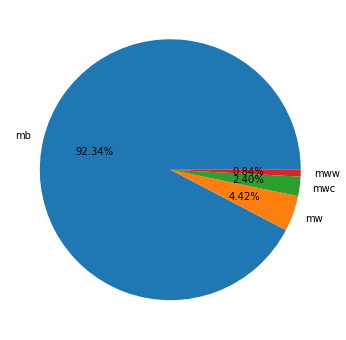

In [50]:
magType=db['magType'].value_counts().index
freq=db['magType'].value_counts().values

plt.pie(x=freq[0:4],labels=magType[0:4],autopct='%1.2f%%')
print(db['magType'].value_counts())

In [51]:
year=db['year'].value_counts().index
freq=db['year'].value_counts().values

([<matplotlib.patches.Wedge at 0x1c6ce5866d0>,
 [Text(-0.05515283625150876, 1.0986164775086047, '2015'),
  Text(-0.764356133742476, -0.7910497461034005, '2008'),
  Text(0.3946567760699896, -1.0267648363194184, '1996'),
  Text(1.019296876015508, -0.41356242400032744, '1998')],
 [Text(-0.030083365228095686, 0.5992453513683297, '51.60%'),
  Text(-0.41692152749589595, -0.43148167969276385, '22.35%'),
  Text(0.21526733240181248, -0.5600535470833191, '13.78%'),
  Text(0.5559801141902769, -0.22557950400017857, '12.27%')])

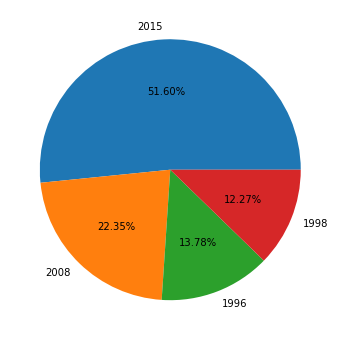

In [52]:
plt.pie(x=freq[0:4],labels=year[0:4],autopct='%1.2f%%')

Most of the earthquakes happened in year 2001

([<matplotlib.patches.Wedge at 0x1c6ce5e91c0>,
 [Text(0.4723484391285973, 0.9934218399314453, '25'),
  Text(-1.0973467138697497, 0.07635567797657158, '12'),
  Text(-0.24004046071735632, -1.0734899055038196, '26'),
  Text(0.9113606016987156, -0.6159722832005959, '27')],
 [Text(0.25764460316105303, 0.5418664581444246, '35.87%'),
  Text(-0.5985527530198634, 0.041648551623584495, '26.04%'),
  Text(-0.13093116039128525, -0.5855399484566288, '19.16%'),
  Text(0.4971057827447539, -0.33598488174577956, '18.92%')])

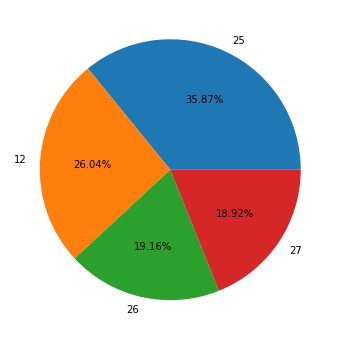

In [53]:
day=db['day'].value_counts().index
freq=db['day'].value_counts().values

plt.pie(x=freq[0:4],labels=day[0:4],autopct='%1.2f%%')

In [54]:
db['day'].value_counts()

25    146
12    106
26     78
27     77
3      56
22     54
5      53
29     51
20     50
28     49
6      48
30     48
8      48
10     46
7      46
18     44
4      42
19     42
9      41
1      41
11     41
21     40
2      39
13     38
24     38
15     37
16     37
23     36
14     35
31     30
17     28
Name: day, dtype: int64

5     238
4     235
8     168
7     131
11    113
9     107
6     104
3     102
10     99
12     95
2      91
1      82
Name: month, dtype: int64


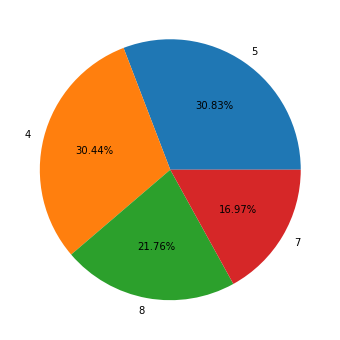

In [55]:
month=db['month'].value_counts().index
freq=db['month'].value_counts().values

plt.pie(x=freq[0:4],labels=month[0:4],autopct='%1.2f%%')
print(db['month'].value_counts())

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mag', ylabel='count'>

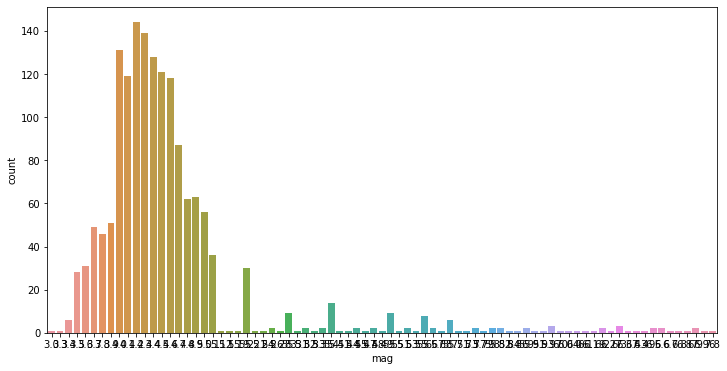

In [56]:
sns.countplot(db['mag'])

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='latitude', ylabel='count'>

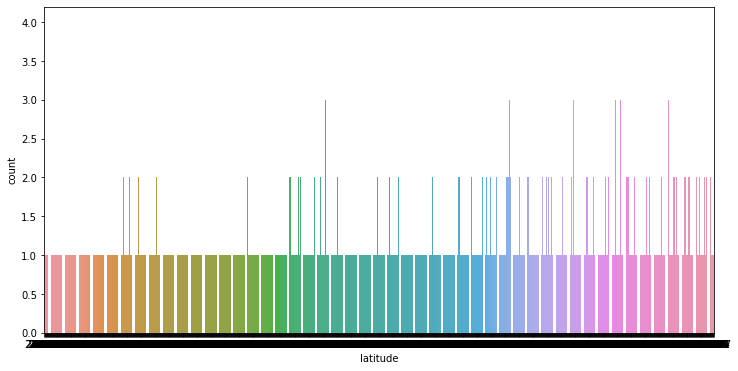

In [57]:
sns.countplot(db['latitude'])

it can be seen almost all values of latitude occur single time except few which occur 2 or 3 times.

repeating latittude represents earthquake reoccuring same place

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='count'>

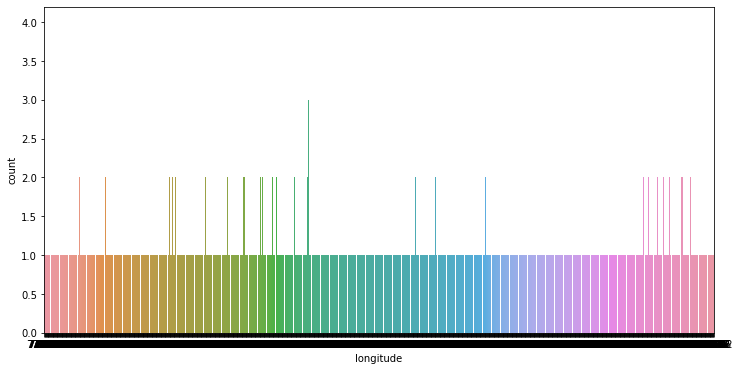

In [58]:
sns.countplot(db['longitude'])

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='depth', ylabel='count'>

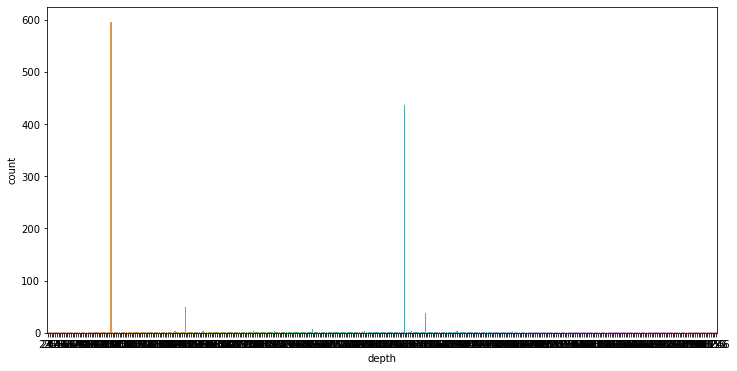

In [59]:
sns.countplot(db['depth'])

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='magType', ylabel='count'>

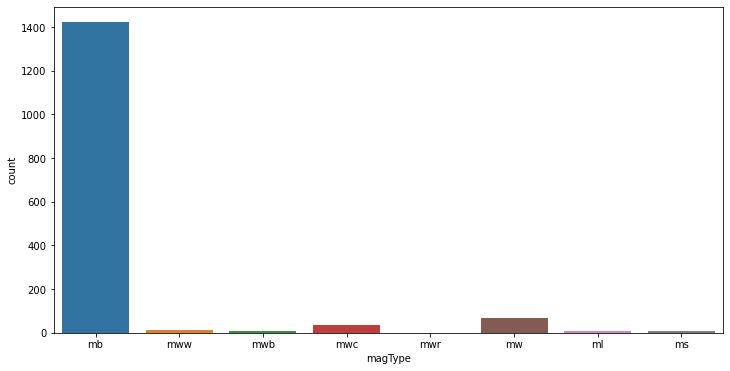

In [60]:
sns.countplot(db['magType'])

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nst', ylabel='count'>

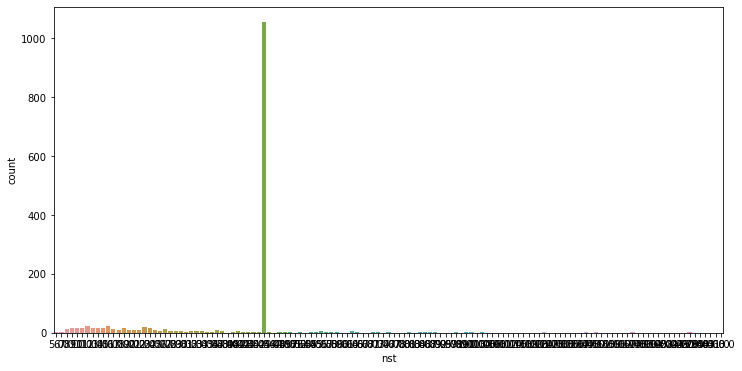

In [61]:
sns.countplot(db['nst'])

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gap', ylabel='count'>

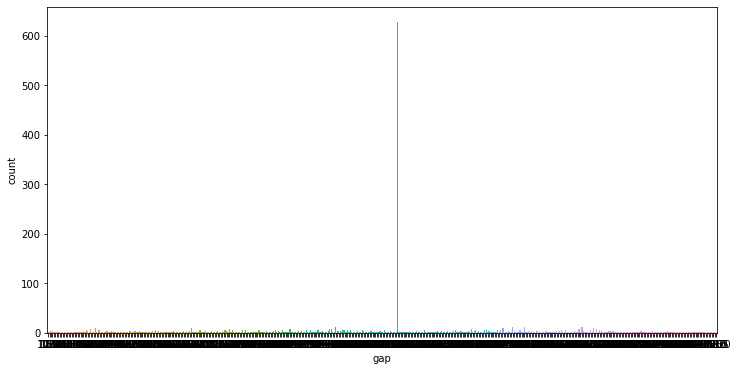

In [62]:
sns.countplot(db['gap'])

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

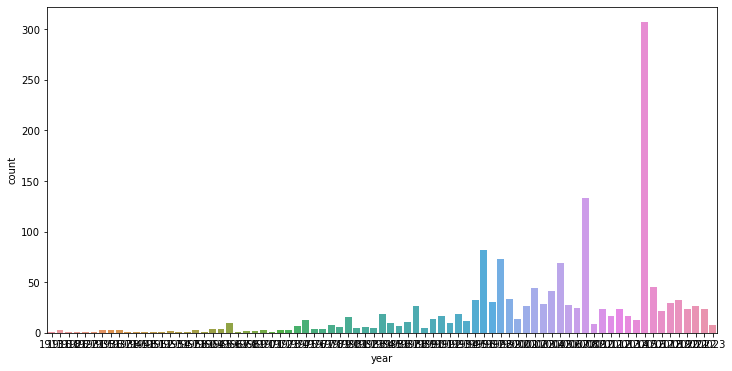

In [63]:
sns.countplot(db['year'])

In [64]:
db.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap',
       'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst',
       'year', 'month', 'day', 'hour', 'min'],
      dtype='object')

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rms', ylabel='count'>

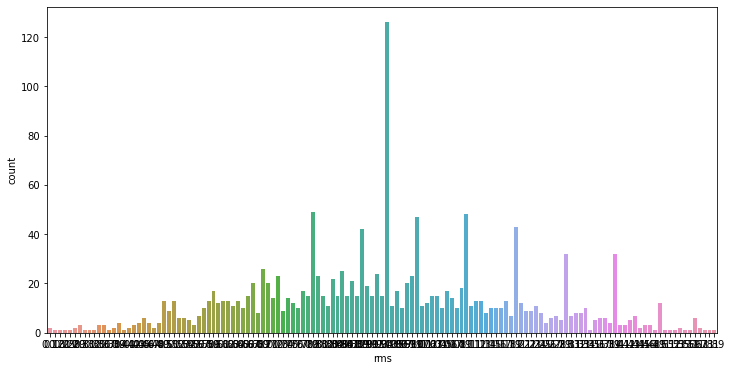

In [65]:
sns.countplot(db['rms'])

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='magNst', ylabel='count'>

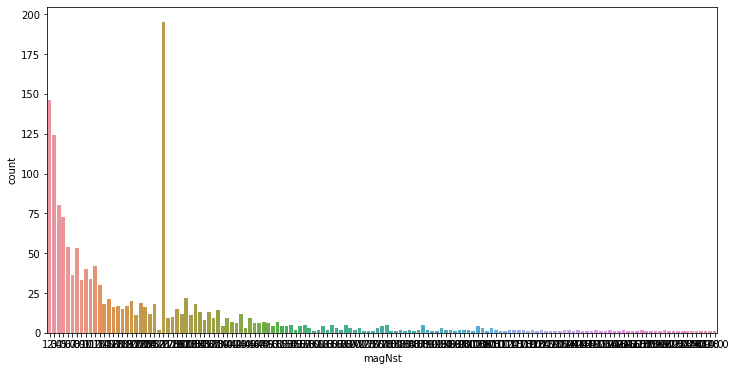

In [66]:
sns.countplot(db['magNst'])

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


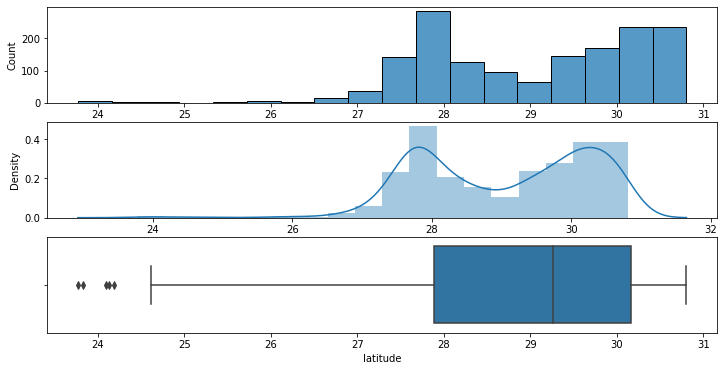

In [67]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(db['latitude'], ax=axs[0]);
sns.distplot(db['latitude'], ax=axs[1])
sns.boxplot(db['latitude'], ax=axs[2]);

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


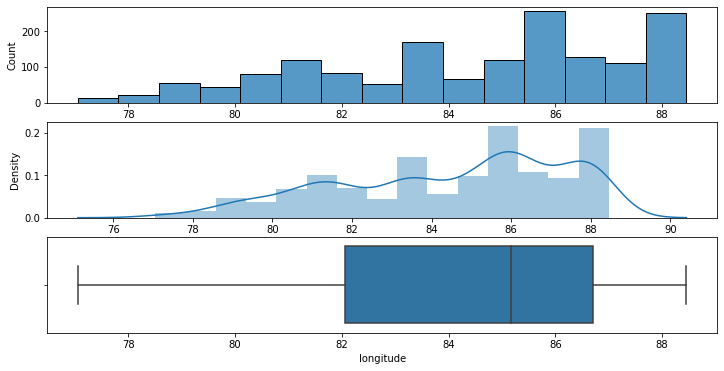

In [68]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(db['longitude'], ax=axs[0]);
sns.distplot(db['longitude'], ax=axs[1])
sns.boxplot(db['longitude'], ax=axs[2]);

In [69]:
db.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap',
       'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst',
       'year', 'month', 'day', 'hour', 'min'],
      dtype='object')

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


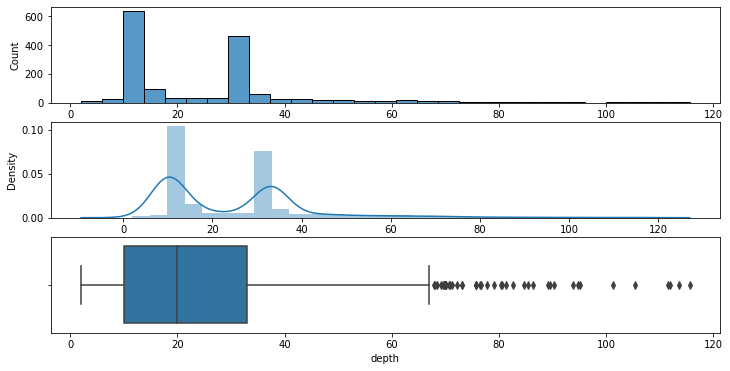

In [70]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(db['depth'], ax=axs[0]);
sns.distplot(db['depth'], ax=axs[1])
sns.boxplot(db['depth'], ax=axs[2]);

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


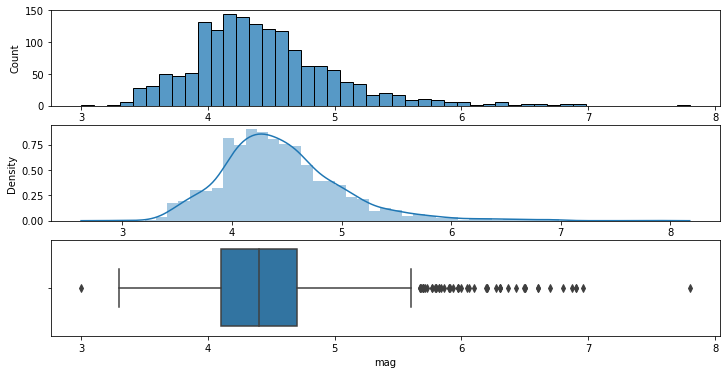

In [71]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(db['mag'], ax=axs[0]);
sns.distplot(db['mag'], ax=axs[1])
sns.boxplot(db['mag'], ax=axs[2]);

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


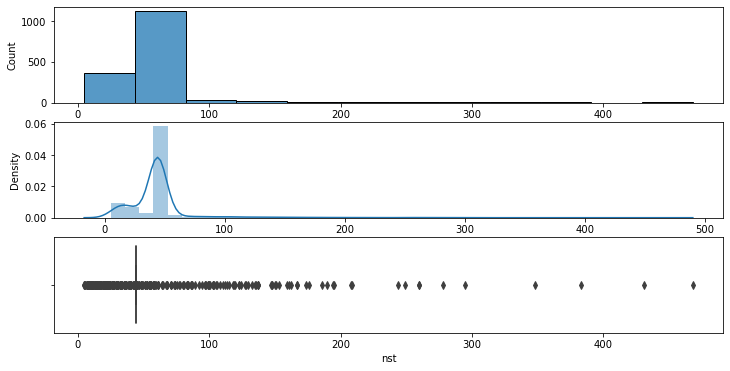

In [72]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(db['nst'], ax=axs[0]);
sns.distplot(db['nst'], ax=axs[1])
sns.boxplot(db['nst'], ax=axs[2]);

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


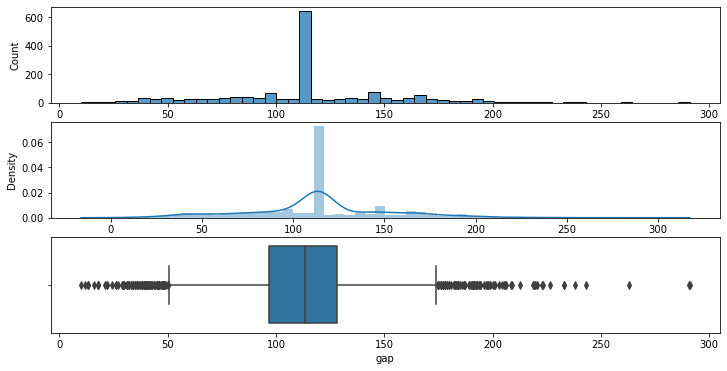

In [73]:
fig, axs = plt.subplots(nrows=3)
sns.histplot(db['gap'], ax=axs[0]);
sns.distplot(db['gap'], ax=axs[1])
sns.boxplot(db['gap'], ax=axs[2]);

C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


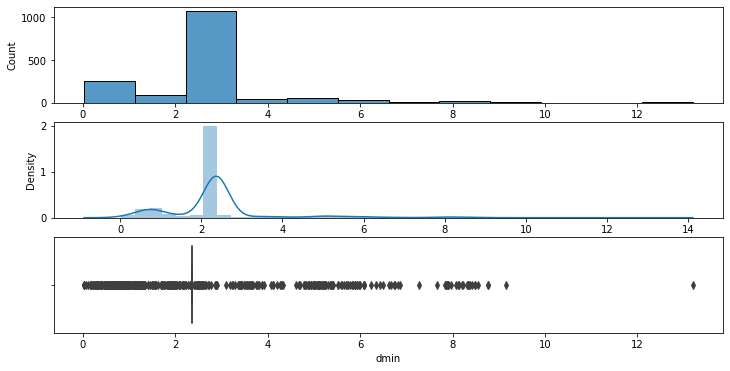

In [74]:

fig, axs = plt.subplots(nrows=3)
sns.histplot(db['dmin'], ax=axs[0]);
sns.distplot(db['dmin'], ax=axs[1])
sns.boxplot(db['dmin'], ax=axs[2]);

### Now lets do bivariate analysis

using scatterplot

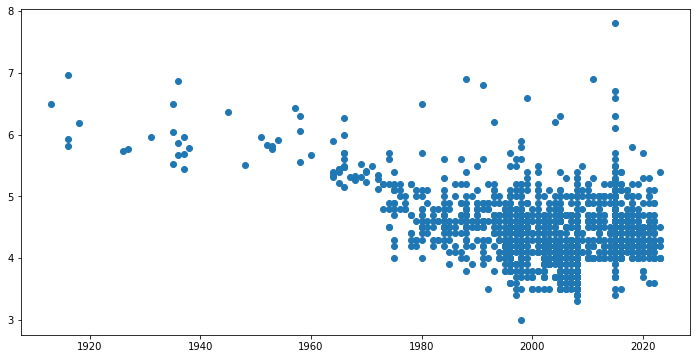

In [75]:
plt.scatter(x='year',y='mag',data=db)

observation:
it can be seen their are more data points after 1980 possible reason for which may be:

1. Data collection technique,instrument for earthquake got serious and efficient

2. In year 2001 their are more no of earthquake that occured


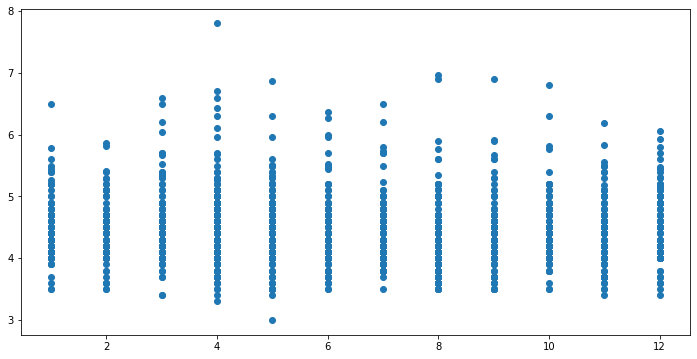

In [76]:
plt.scatter(x='month',y='mag',data=db)

month and magnitude distribution is almost same representing not much impact of month 

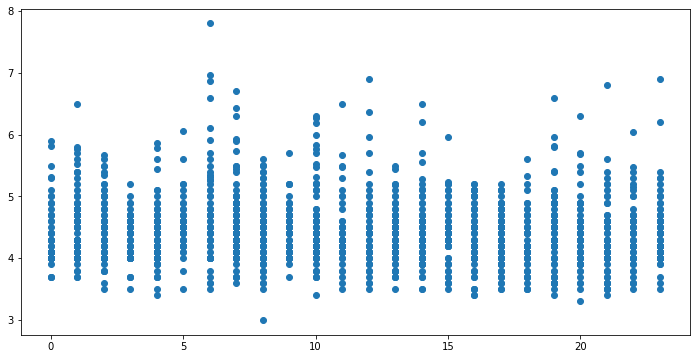

In [77]:
plt.scatter(x='hour',y='mag',data=db)

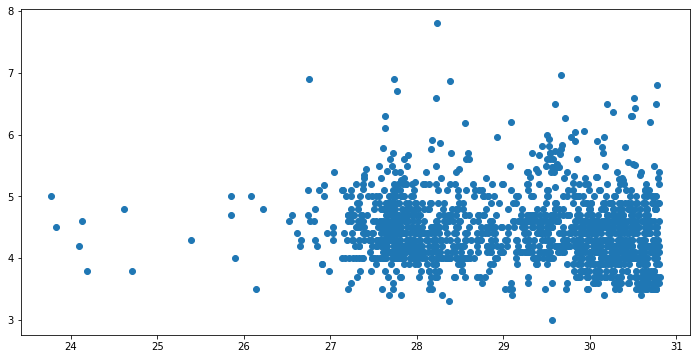

In [78]:
plt.scatter(x='latitude',y='mag',data=db)

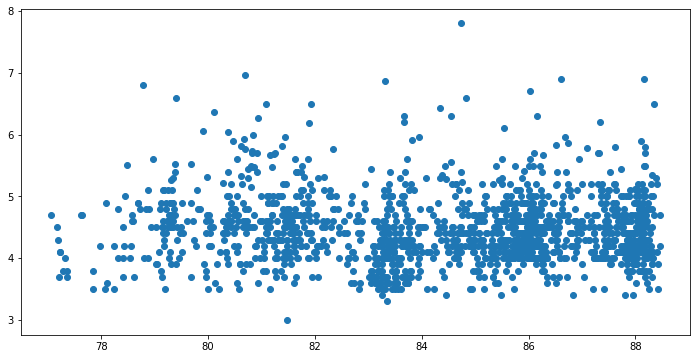

In [79]:
plt.scatter(x='longitude',y='mag',data=db)

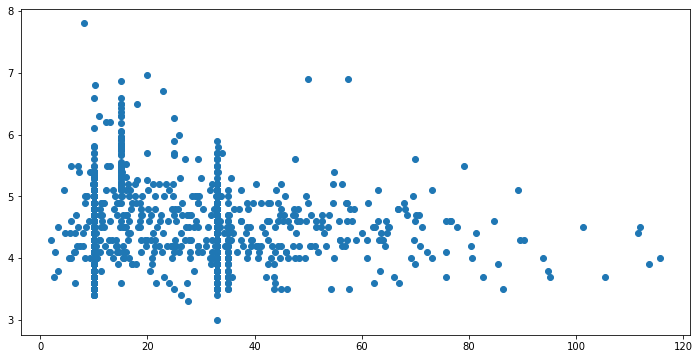

In [80]:
plt.scatter(x='depth',y='mag',data=db)

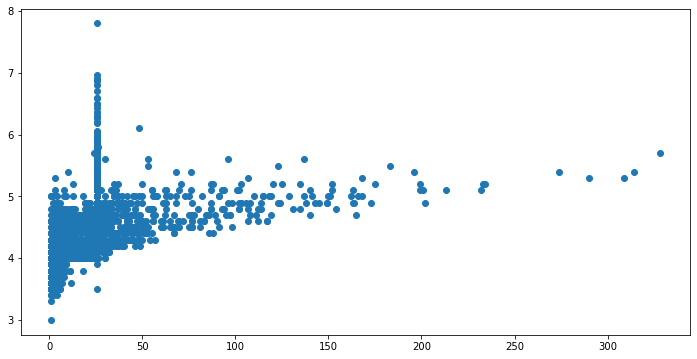

In [81]:
plt.scatter(x='magNst',y='mag',data=db)

In [82]:
db.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap',
       'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst',
       'year', 'month', 'day', 'hour', 'min'],
      dtype='object')

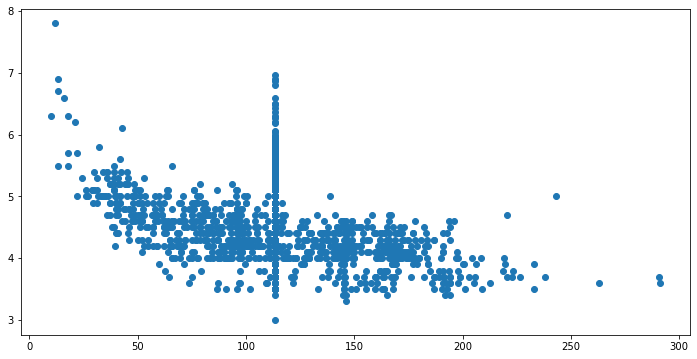

In [83]:
plt.scatter(x='gap',y='mag',data=db)

it can be seen that as gap is increasing the magnitude of earthquake also decreases. the points where we see more number of points in same line is beacuse we replaced the null values with mean

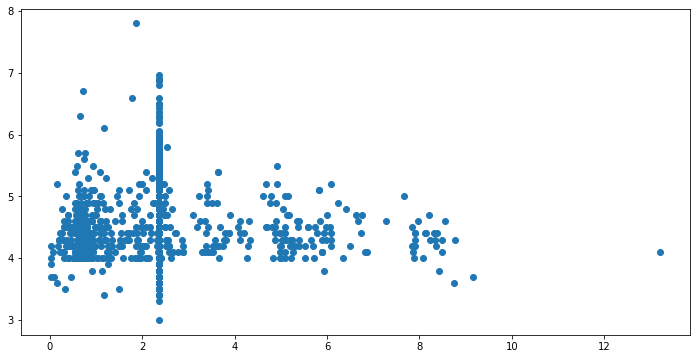

In [84]:
plt.scatter(x='dmin',y='mag',data=db)

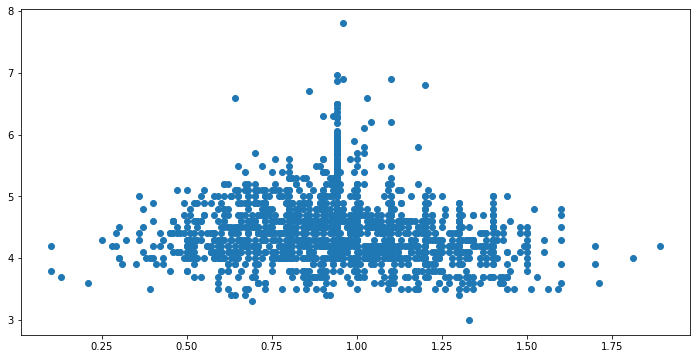

In [85]:
plt.scatter(x='rms',y='mag',data=db)

In [86]:
db.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap',
       'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst',
       'year', 'month', 'day', 'hour', 'min'],
      dtype='object')

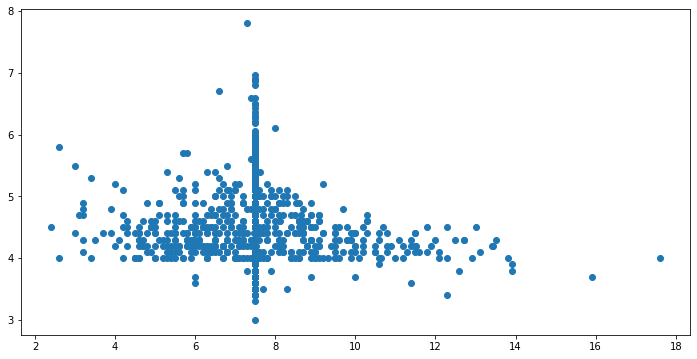

In [87]:
plt.scatter(x='horizontalError',y='mag',data=db)

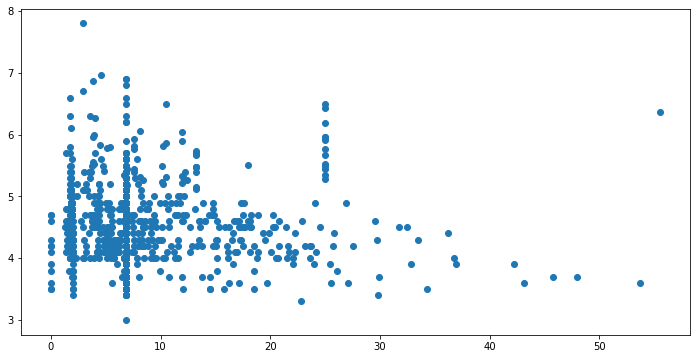

In [88]:
plt.scatter(x='depthError',y='mag',data=db)

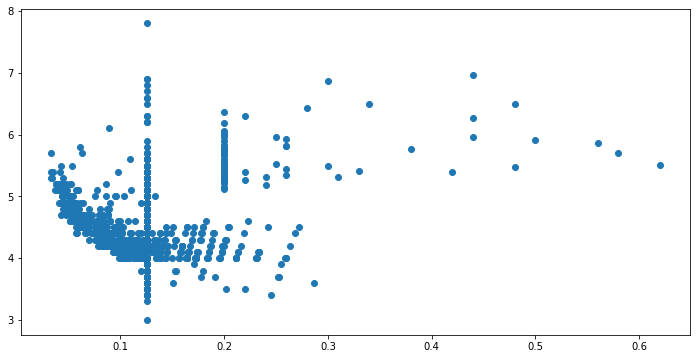

In [89]:
plt.scatter(x='magError',y='mag',data=db)

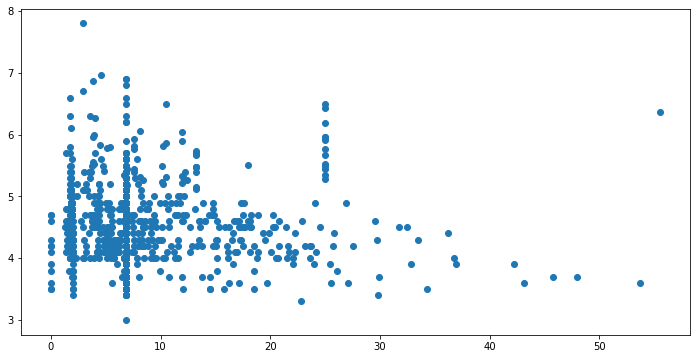

In [90]:
plt.scatter(x='depthError',y='mag',data=db)

<AxesSubplot:>

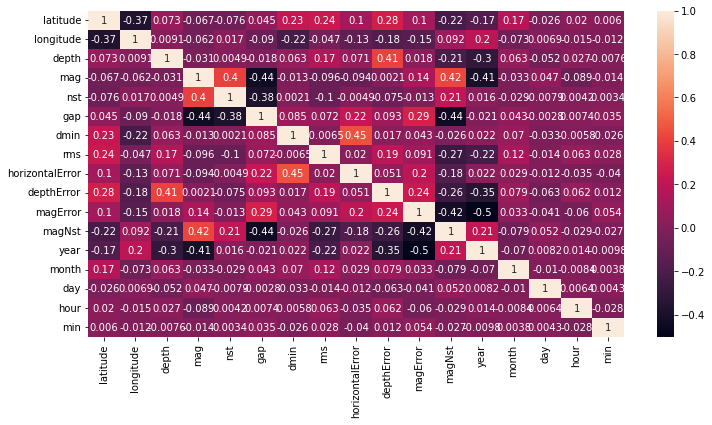

In [91]:
#drawing heatmap
sns.heatmap(db.corr(),annot=True,cbar='coolwarm')

observation:
1. variables which have positive correlation with magnitude:

    . nst ->0.4
    . magnst -> 0.42
    . depth error and magerror
2. negative corr:
     . gap -0.44
     . year -0.41
    

def correlation(data):
    pos=dict()
    neg=dict()
    corr_matrix=data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j]>0:
                pos[corr_matrix.columns[i]]=corr_matrix.iloc[i,j]
            else:
                neg[corr_matrix.columns[i]]=corr_matrix.iloc[i,j]
    print(pos)  
    print("") 
    print(neg)

In [92]:
db.drop(columns=['magType'],inplace=True)

In [93]:
db.drop(columns=['dmin'],inplace=True)

In [94]:
db.drop(columns=['depthError','min'],inplace=True)

In [95]:
db.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'rms',
       'horizontalError', 'magError', 'magNst', 'year', 'month', 'day',
       'hour'],
      dtype='object')

### feature scaling

There are two major types of feature scaling :

1. Standardization.
2. Normalization.

We can use StandardScalar to scale our data:


StandardScaler is used to resize the distribution of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1.
The values will lie be between -1 and 1.

In [96]:
#spliting the data in target and input variable
x=db.drop(columns='mag')
y=db['mag']

In [97]:
x

,latitude,longitude,depth,nst,gap,rms,horizontalError,magError,magNst,year,month,day,hour
0,25.9004,87.2664,10.000,19.000000,178.000000,0.7800,7.050000,0.173,9.000000,2023,4,12,0
1,28.7306,86.7005,57.329,22.000000,138.000000,0.6300,7.040000,0.108,24.000000,2023,4,8,14
2,27.6685,86.1761,10.000,37.000000,84.000000,0.6200,6.890000,0.086,40.000000,2023,4,1,5
3,29.6326,81.8280,30.882,23.000000,171.000000,0.8000,13.440000,0.152,12.000000,2023,3,24,4
4,28.3307,87.3045,10.000,28.000000,106.000000,0.3800,2.610000,0.119,19.000000,2023,3,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,28.5580,81.8830,15.000,44.182353,113.604797,0.9413,7.498566,0.200,25.578832,1918,11,29,10
1603,29.5270,80.6710,15.000,44.182353,113.604797,0.9413,7.498566,0.260,25.578832,1916,12,24,7
1604,29.4500,80.6230,15.000,44.182353,113.604797,0.9413,7.498566,0.260,25.578832,1916,10,14,19
1605,29.6700,80.6840,20.000,44.182353,113.604797,0.9413,7.498566,0.440,25.578832,1916,8,28,6


In [98]:
y

0       4.00
1       4.30
2       4.50
3       4.20
4       4.00
        ... 
1602    6.19
1603    5.93
1604    5.82
1605    6.96
1606    6.50
Name: mag, Length: 1565, dtype: float64

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
standarscaler=StandardScaler()

In [101]:
standarscaler=standarscaler.fit(x)
scaled_x=standarscaler.transform(x)

## Data Modelling

In [102]:
scaled_x

array([[-2.57120754,  0.98330359, -0.85531921, ..., -0.75518504,
        -0.52962429, -1.69141441],
       [-0.25549281,  0.78323273,  1.97906257, ..., -0.75518504,
        -0.97590886,  0.35197386],
       [-1.12451995,  0.59783397, -0.85531921, ..., -0.75518504,
        -1.75690685, -0.96163289],
       ...,
       [ 0.33313173, -1.36543429, -0.55588527, ...,  1.18176867,
        -0.30648201,  1.08175539],
       [ 0.51313923, -1.34386807, -0.25645134, ...,  0.53611743,
         1.25551398, -0.81567658],
       [ 0.94761189, -0.9037051 , -0.55588527, ..., -1.07801066,
        -1.19905114, -0.08589505]])

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,train_size=0.8, random_state=2)

### LinearRegression

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
lr=LinearRegression()

In [106]:
lr.fit(x_train,y_train)

LinearRegression()

In [107]:
lrprediction=lr.predict(x_test)

In [108]:
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error, r2_score 

In [109]:
mse = mean_squared_error(y_test, lrprediction)
rmse = mean_squared_error(y_test, lrprediction, squared=False)
mae = mean_absolute_error(y_test, lrprediction)
r2 = r2_score(y_test, lrprediction)

print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("Mean absolute error:", mae)
print("R-squared:", r2)

Mean squared error: 0.1162331610868437
Root mean squared error: 0.3409298477500081
Mean absolute error: 0.24760981381675287
R-squared: 0.6195972518232984


our predictions are not perfect, but they are reasonable. We are off by an average of 0.067 units from the actual values, which is relatively small compared to the range of the target variable. Additionally, our R2 value of 0.621 indicates that our model is able to explain about 62.1% of the variance in the target variable.

### Random Forest

In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
rf=RandomForestRegressor()

In [112]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [113]:
rf_prediciton=rf.predict(x_test)

In [114]:
mse = mean_squared_error(y_test, rf_prediciton)
rmse = mean_squared_error(y_test, rf_prediciton, squared=False)
mae = mean_absolute_error(y_test, rf_prediciton)
r2 = r2_score(y_test, rf_prediciton)

print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("Mean absolute error:", mae)
print("R-squared:", r2)

Mean squared error: 0.07288701015974441
Root mean squared error: 0.2699759436685877
Mean absolute error: 0.19738338658146962
R-squared: 0.7614586172148056


In summary, our predictions are not very accurate, and we are off by an average of 0.072 units from the actual values. Our R2 value of 0.761 indicates that our model is only able to explain about 76.1% of the variance in the target variable. There is significant room for improvement in our prediction, and we need to consider modifying our model or exploring different features to improve the performance.


### Decision Tree

In [115]:
from sklearn.tree import DecisionTreeRegressor

In [116]:
dt=DecisionTreeRegressor(max_depth=1)

In [117]:
dt.fit(x_train,y_train)


DecisionTreeRegressor(max_depth=1)

In [118]:
dtpredicition=dt.predict(x_test)

In [119]:
mse = mean_squared_error(y_test, dtpredicition)
rmse = mean_squared_error(y_test, dtpredicition, squared=False)
mae = mean_absolute_error(y_test, dtpredicition)
r2 = r2_score(y_test, dtpredicition)

print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("Mean absolute error:", mae)
print("R-squared:", r2)

Mean squared error: 0.1885816959896234
Root mean squared error: 0.43425994057663597
Mean absolute error: 0.32818326142090276
R-squared: 0.38281816704031935


he R-squared value of 0.3828 indicates that the model only explains 38% of the total variation in the target variable. This means that a large portion of the variation in the target variable is not explained by the model, 

### Support Vector Machine

In [120]:
from sklearn.svm import SVR

In [121]:
svr=SVR(kernel='linear', C=1e3, gamma=0.1, epsilon=0.1)

In [122]:
svr.fit(x_train,y_train)

SVR(C=1000.0, gamma=0.1, kernel='linear')

In [123]:
svrpredict=svr.predict(x_test)

In [124]:
mse = mean_squared_error(y_test, svrpredict)
rmse = mean_squared_error(y_test, svrpredict, squared=False)
mae = mean_absolute_error(y_test, svrpredict)
r2 = r2_score(y_test, svrpredict)

print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("Mean absolute error:", mae)
print("R-squared:", r2)

Mean squared error: 0.11986001698300167
Root mean squared error: 0.3462080544744759
Mean absolute error: 0.2489387302272193
R-squared: 0.6077274382757811


The R-squared value indicates the proportion of variance in the target variable that can be explained by the model. A higher R-squared value indicates better performance. In this case, the R-squared value is 0.60772, which indicates that the model can explain about 60.7% of the variance in the target variable. 

### Gradient Boosting

In [125]:
from sklearn.ensemble import GradientBoostingRegressor

In [126]:
gbr=GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, max_depth=1, random_state=42)

In [127]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=1, n_estimators=1000,
                          random_state=42)

In [128]:
gbrprediction=gbr.predict(x_test)

In [129]:
mse = mean_squared_error(y_test, gbrprediction)
rmse = mean_squared_error(y_test, gbrprediction, squared=False)
mae = mean_absolute_error(y_test, gbrprediction)
r2 = r2_score(y_test, svrpredict)

print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("Mean absolute error:", mae)
print("R-squared:", r2)

Mean squared error: 0.08053170341224405
Root mean squared error: 0.2837810836053807
Mean absolute error: 0.2103581067257553
R-squared: 0.6077274382757811


R-squared (R2) is a measure of how well the model fits the data. It takes values between 0 and 1, with higher values indicating a better fit. In this case, the R2 score is 0.6077, which is not too high but still suggests that the model is a good fit for the data.

Overall, the model's accuracy seems to be fairly good based on these performance metrics, but it could potentially be improved further.

## Random forest has the heighest accuracy : R-squared: 0.7614586172148056